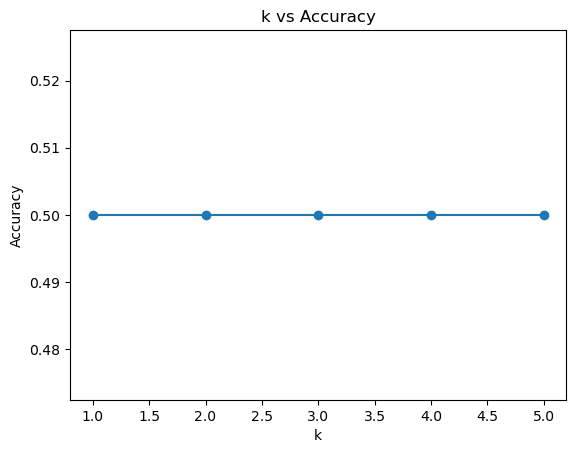

Best k for maximum accuracy: 1
Final Accuracy: 0.5
Confusion Matrix:
[[0. 1.]
 [0. 1.]]


In [10]:
'''1. Implement K-NN Classifier for classification of any dataset of your choice.
a. Load an existing data set
b. Split the data set to train and test sets
c. Test your model using test set. Find accuracy and confusion Matrix.
d. Examine the effect of the value of K on accuracy/performance. Plot the curve “k vs
accuracy” and find out the value of k for maximum accuracy for the test samples.
NOTE: Don’t use any library. Develop a generalised function to implement K-NN Classifier.'''

import numpy as np
def load_dataset():
    X = np.array([[13, 2], [4, 3], [15, 4], [6, 5], [8, 6], [6, 7]])
    y = np.array([0, 0, 1, 1, 1, 0])
    return X, y
def train_test_split(X, y, test_size=0.2):
    split_idx = int((1 - test_size) * len(X))
    X_train, X_test = X[:split_idx], X[split_idx:]
    y_train, y_test = y[:split_idx], y[split_idx:]
    return X_train, X_test, y_train, y_test

def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2)**2))

def predict(X_train, y_train, x_test, k):
    distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
    k_indices = np.argsort(distances)[:k]
    k_nearest_labels = [y_train[i] for i in k_indices]
    most_common = np.argmax(np.bincount(k_nearest_labels))
    return most_common
def accuracy(y_true, y_pred):
    accuracy = np.sum(y_true == y_pred) / len(y_true)
    return accuracy
def confusion_matrix(y_true, y_pred):
    num_classes = len(np.unique(y_true))
    matrix = np.zeros((num_classes, num_classes))
    for i in range(len(y_true)):
        matrix[y_true[i], y_pred[i]] += 1
    return matrix
def knn_classifier(X_train, X_test, y_train, y_test, k_values):
    accuracies = []
    for k in k_values:
        y_pred = [predict(X_train, y_train, x_test, k) for x_test in X_test]
        acc = accuracy(y_test, y_pred)
        accuracies.append(acc)
    return accuracies
import matplotlib.pyplot as plt
def plot_k_vs_accuracy(k_values, accuracies):
    plt.plot(k_values, accuracies, marker='o')
    plt.title('k vs Accuracy')
    plt.xlabel('k')
    plt.ylabel('Accuracy')
    plt.show()
if __name__ == "__main__":
    X, y = load_dataset()
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
    k_values = range(1, 6) 
    accuracies = knn_classifier(X_train, X_test, y_train, y_test, k_values)
    plot_k_vs_accuracy(k_values, accuracies)
    best_k = k_values[np.argmax(accuracies)]
    print("Best k for maximum accuracy:", best_k)
    y_pred = [predict(X_train, y_train, x_test, best_k) for x_test in X_test]
    final_accuracy = accuracy(y_test, y_pred)
    print("Final Accuracy:", final_accuracy)
    print("Confusion Matrix:")
    print(confusion_matrix(y_test, y_pred))
